MIT License

Copyright (c) 2021 Taiki Miyagawa and Akinori F. Ebihara

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

# Statistics of UCF101 (clipped)
## Duration = 50
* Num of total videos: 56257
* Num of total frames: 2812850
* Max num of frames in a video: 50
* Min num of frames in a video: 50
* Classwise sample sizes: [558, 456, 547, 506, 319, 729, 380, 440, 273, 461, 676, 925, 669, 284, 350, 466, 710, 704, 414, 722, 478, 306, 341, 396, 430, 600, 941, 341, 356, 433, 299, 523, 527, 502, 593, 437, 370, 429, 610, 337, 697, 719, 317, 876, 298, 665, 1335, 255, 649, 582, 416, 654, 372, 395, 509, 683, 382, 331, 836, 955, 1045, 911, 800, 525, 1206, 656, 416, 577, 906, 323, 891, 220, 482, 1169, 470, 971, 641, 801, 332, 385, 641, 533, 469, 951, 321, 469, 520, 568, 530, 545, 415, 603, 317, 558, 591, 368, 324, 590, 360, 572, 521]

## Duration = 150
* Num of total videos: 22579
* Num of total frames: 3386850
* Max num of frames in a video: 150
* Min num of frames in a video: 150
* Classwise sample sizes: [227, 191, 226, 210, 125, 290, 158, 174, 133, 198, 281, 353, 264, 127, 145, 175, 290, 273, 170, 287, 189, 138, 148, 173, 178, 250, 320, 120, 153, 185, 129, 210, 212, 199, 247, 181, 149, 173, 242, 132, 268, 315, 133, 314, 129, 242, 500, 123, 303, 233, 169, 246, 135, 141, 201, 272, 152, 124, 334, 363, 381, 352, 320, 210, 436, 245, 202, 241, 347, 142, 303, 103, 185, 434, 225, 372, 301, 326, 148, 160, 264, 208, 205, 359, 140, 188, 201, 223, 221, 220, 200, 250, 134, 232, 223, 154, 135, 237, 146, 230, 254]

## Get statistical information

In [1]:
from glob import glob
import os
import statistics
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
DATADIR = "Define this first. E.g., /data/t-miyagawa"
duration = 50 # 50 or 150

In [2]:
# Get videodir and numf
datadir = "{}/UCF101clip{}".format(DATADIR, duration)
classdir = sorted(glob(datadir + "/*"))
classdir = [i + "/" for i in classdir]
classnames = [i[i.rfind("UCF101clip{}/".format(duration)) + 11 + len(str(duration)) : -1] for i in classdir]
videodir = {
    k : 
    sorted(glob([v for v in classdir if v.find("/" + k + "/") != -1][0] + "/*"))
    for k in classnames}

numf = dict()
for k in classnames:
    v = videodir[k]
    numf[k] = [len(glob(_video + "/*.png")) for _video in v]

videodir, numf # path to video directories, num of frames for each

({'ApplyEyeMakeup': ['/data/t-miyagawa/UCF101clip50/ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c01_cc01',
   '/data/t-miyagawa/UCF101clip50/ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c01_cc02',
   '/data/t-miyagawa/UCF101clip50/ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c01_cc03',
   '/data/t-miyagawa/UCF101clip50/ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c01_cc04',
   '/data/t-miyagawa/UCF101clip50/ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c02_cc01',
   '/data/t-miyagawa/UCF101clip50/ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c02_cc02',
   '/data/t-miyagawa/UCF101clip50/ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c02_cc03',
   '/data/t-miyagawa/UCF101clip50/ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c03_cc01',
   '/data/t-miyagawa/UCF101clip50/ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c03_cc02',
   '/data/t-miyagawa/UCF101clip50/ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c03_cc03',
   '/data/t-miyagawa/UCF101clip50/ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c03_cc04',
   '/data/t-miyagawa/UCF101clip50/ApplyEyeMakeup/v_ApplyEyeMakeup_g01_c03_cc05',
   '/data/

In [3]:
# Smear the keys
numf_concat = []
for k in classnames:
    v = numf[k]
    numf_concat.extend(v)

videodir_concat = []
for k in classnames:
    v = videodir[k]
    videodir_concat.extend(v)
    
# Classwise num of frames
numf_classwise = []
for k in classnames:
    v = numf[k]
    v = sum(v)
    numf_classwise.append(v)
    
# Classwise num of videos
numv_classwise = []
for k in classnames:
    v = videodir[k]
    v = len(v)
    numv_classwise.append(v)
    
# Classwise num of unique videos (groups)
numuv_classwise = []
for k in classnames:
    v = videodir[k][-1]
    numuv_classwise.append(int(v[v.rfind("_g") + 2: v.rfind("_cc")-4]))

In [4]:
# Returns:
#     classnames: List. Len = Num of classes. Names of classes in alphabetical order.
#
#     videodir: Dict. Paths to video directories. Each values (paths) are in alphabetical order of video names.
#     numf: Dict. Num of frames for each videos. Each values (integers) are in alphabetical order of video names.
#
#     numf_concat: List. Len = Num of total videos. Order is the same as `videoddir_concat`.
#     videodir_concat: List. Len = Num of total videos. Order is the same as `numf_concat`.
#
#     numf_classwise: List. Len = Num of classes. The classwise numbers of frames in alphabetical order of class names.
#     numv_classwise: List. Len = Num of classes. The classwise numbers of videos in alphabetical order of class names.
#     numuv_classwise: List. Len = Num of classes. The classwise numbers of unique videos (groups) in alphabetical order of class names.

## Statistics

In [5]:
print("* Num of total videos: {}".format(len(numf_concat)))
print("* Num of total frames: {}".format(sum(numf_concat)))
print("* Max num of frames in a video: {}".format(max(numf_concat)))
print("* Min num of frames in a video: {}".format(min(numf_concat)))

_numshow = 10
print("* Long videos (descending order):\n{}".format(np.array(videodir_concat)[np.argsort(numf_concat)[-_numshow:][::-1]]))
print("Num of frames:\n{}".format(sorted(numf_concat)[-_numshow:][::-1]))
print("\n* Short videos (ascending order):\n{}".format(np.array(videodir_concat)[np.argsort(numf_concat)[:_numshow]]))
print("Num of frames:\n{}".format(sorted(numf_concat)[:_numshow]))

* Num of total videos: 56257
* Num of total frames: 2812850
* Max num of frames in a video: 50
* Min num of frames in a video: 50
* Long videos (descending order):
['/data/t-miyagawa/UCF101clip50/YoYo/v_YoYo_g25_c05_cc04'
 '/data/t-miyagawa/UCF101clip50/HandstandWalking/v_HandstandWalking_g18_c07_cc05'
 '/data/t-miyagawa/UCF101clip50/HandstandWalking/v_HandstandWalking_g19_c02_cc04'
 '/data/t-miyagawa/UCF101clip50/HandstandWalking/v_HandstandWalking_g19_c02_cc03'
 '/data/t-miyagawa/UCF101clip50/HandstandWalking/v_HandstandWalking_g19_c02_cc02'
 '/data/t-miyagawa/UCF101clip50/HandstandWalking/v_HandstandWalking_g19_c02_cc01'
 '/data/t-miyagawa/UCF101clip50/HandstandWalking/v_HandstandWalking_g19_c01_cc05'
 '/data/t-miyagawa/UCF101clip50/HandstandWalking/v_HandstandWalking_g19_c01_cc04'
 '/data/t-miyagawa/UCF101clip50/HandstandWalking/v_HandstandWalking_g19_c01_cc03'
 '/data/t-miyagawa/UCF101clip50/HandstandWalking/v_HandstandWalking_g19_c01_cc02']
Num of frames:
[50, 50, 50, 50, 50, 50,

(array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0., 

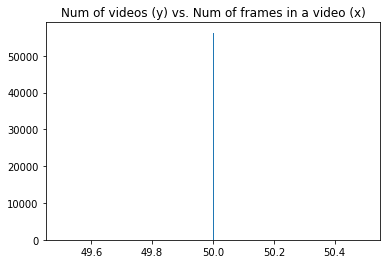

In [6]:
plt.title("Num of videos (y) vs. Num of frames in a video (x)")
#plt.yscale("log")
plt.hist(numf_concat, bins=500)

In [7]:
print("Mean: {}".format(statistics.mean(numf_concat)))
print("Median: {}".format(statistics.median(numf_concat)))
print("Mode: {}".format(statistics.mode(numf_concat)))

Mean: 50
Median: 50
Mode: 50


<BarContainer object of 101 artists>

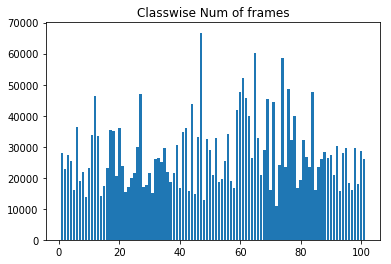

In [8]:
plt.title("Classwise Num of frames")
#plt.yscale("log")
plt.bar([i + 1 for i in range(101)], numf_classwise)

In [9]:
print("Mean: {}".format(statistics.mean(numf_classwise)))
print("Median: {}".format(statistics.median(numf_classwise)))

Mean: 27850
Median: 26050


<BarContainer object of 101 artists>

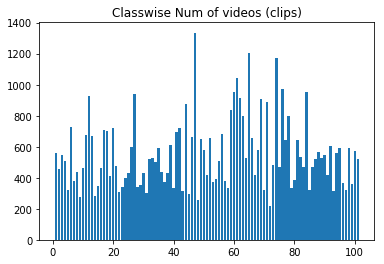

In [10]:
plt.title("Classwise Num of videos (clips)")
#plt.yscale("log")
plt.bar([i + 1 for i in range(101)], numv_classwise)

In [11]:
print("Mean: {}".format(statistics.mean(numv_classwise)))
print("Median: {}".format(statistics.median(numv_classwise)))
print("Raw data of classwise num of videos (clips):")
print(numv_classwise)

Mean: 557
Median: 521
Raw data of classwise num of videos (clips):
[558, 456, 547, 506, 319, 729, 380, 440, 273, 461, 676, 925, 669, 284, 350, 466, 710, 704, 414, 722, 478, 306, 341, 396, 430, 600, 941, 341, 356, 433, 299, 523, 527, 502, 593, 437, 370, 429, 610, 337, 697, 719, 317, 876, 298, 665, 1335, 255, 649, 582, 416, 654, 372, 395, 509, 683, 382, 331, 836, 955, 1045, 911, 800, 525, 1206, 656, 416, 577, 906, 323, 891, 220, 482, 1169, 470, 971, 641, 801, 332, 385, 641, 533, 469, 951, 321, 469, 520, 568, 530, 545, 415, 603, 317, 558, 591, 368, 324, 590, 360, 572, 521]


<BarContainer object of 101 artists>

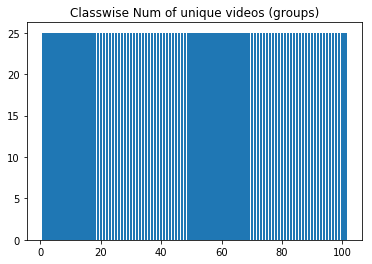

In [12]:
plt.title("Classwise Num of unique videos (groups)")
#plt.yscale("log")
plt.bar([i + 1 for i in range(101)], numuv_classwise)

In [13]:
print("Mean: {}".format(statistics.mean(numuv_classwise)))
print("Median: {}".format(statistics.median(numuv_classwise)))

Mean: 25
Median: 25
